# Text Retrieval and Mining - Data Science Minor - Assignment

Data Science Minor

Faculty of Economics and Business

University of Amsterdam

Authors: Claudia Orellana Rodriguez, [Julien Rossi](mailto://j.rossi@uva.nl)

# Student Group

* Student 1 George Christian Cotea (13842013)
* Student 2 Laura Maria Vochita (13982540)
* Student 3 Maximilian Luca Johannes Arnold Wahnke (13834541)

# Instructions

* This assignment is a group assignment
* Submit this notebook through Canvas
* The assignment is made of 3 questions
* The assignment includes an oral presentation in which you will describe your work and justify your answers

___


**GRADING**
* Question 1: 5 points
* Question 2: 10 points
* Question 3: 5 points


#Floods in Malawi

For this assigment you are provided a collection of news articles from Malawi's main news media - 4 news media in total. The articles, published between January and April 2019, cover the occurrence of floods around the country.

Using these text files, your assignment consists of 3 questions:

1.   Extract top-10 terms or keywords per document.

2.   Extract the polarity of each news article. The polarity tells us if a text is positive, negative, or neutral.

3. Extract the named entities mentioned in the news articles.


## Setup



## Dataset

* You can access the dataset here: https://raw.githubusercontent.com/j-rossi-nl/teaching-data/main/2024_TRTM/malawi_news_2019.txt
* It is one CSV file using `"\t"` as a separator
* It can be loaded into a pandas DataFrame using `pd.read_csv(URL, sep="\t")`
* The dataset is made of 137 news articles

## Tools

* SKLearn CountVectorizer, TfidfVectorizer, Lasso
* SpaCy [Documentation](https://spacy.io/usage)
* Textblob [Documentation](https://textblob.readthedocs.io/en/dev/)

In [ ]:
!pip install spacy en_core_web_sm textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/j-rossi-nl/teaching-data/main/2024_TRTM/malawi_news_2019.txt", sep="\t")

# Question 1 - Keyword Extraction

* Identify 5 unigram keywords per article
* Identify 3 bigram keywords per article
* Within a document, a keywords are terms (either unigram or bigram) with the highest TFIDF coefficient
* Use TfidfVectorizer and set the parameters of the vectorizer
* A keyword should not be a stopword
* A keyword is lowercase
* A keyword is a lemma
* A keyword is a word with at least 2 letters
* Store the keywords into 2 columns:
  * `unigram_keywords` and `bigram_keywords`
  * as a string with keywords separated by comma, such as `flood, food, river, ...` or `major flood, ...`

In [ ]:
#Imports and download extras
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Apply preprocessing (tokenizer, lemmatizer, remove words shorter than two, set words to lowercase, remove stopwords)
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and len(token) >= 2 and token.lower() not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing function
df['corpus'] = df['text'].apply(preprocess_text)

# Create a TfidfVectorizer with unigrams and bigrams
vectorizer_1gram = TfidfVectorizer(ngram_range=(1, 1))

vectorizer_2gram = TfidfVectorizer(ngram_range=(2, 2))

# Fit and transform the data
tfidf_matrix_1gram = vectorizer_1gram.fit_transform(df['corpus'])

tfidf_matrix_2gram = vectorizer_2gram.fit_transform(df['corpus'])

# Get feature names (words) from the vectorizer
feature_names_1gram = vectorizer_1gram.get_feature_names_out()

feature_names_2gram = vectorizer_2gram.get_feature_names_out()

# Convert the TF-IDF matrices to DataFrames for easier manipulation
df_tfidf_1gram = pd.DataFrame(tfidf_matrix_1gram.toarray(), columns=feature_names_1gram)

df_tfidf_2gram = pd.DataFrame(tfidf_matrix_2gram.toarray(), columns=feature_names_2gram)

# Create columns to store top unigrams and bigrams
df['top_unigrams'] = ''
df['top_bigrams'] = ''

# Iterate over each document to extract top unigrams and bigrams
for i, document in enumerate(df['corpus']):
    # Extract top 5 unigrams
    top_unigrams = df_tfidf_1gram.iloc[i].nlargest(5).index.tolist()
    df.at[i, 'top_unigrams'] = ', '.join(top_unigrams)

    # Extract top 3 bigrams
    top_bigrams = df_tfidf_2gram.iloc[i].nlargest(3).index.tolist()
    df.at[i, 'top_bigrams'] = ', '.join(top_bigrams)

In [ ]:
# Move the relevant columns to a new dataframe in order to print it out
df_assignment1 = df[['text', 'corpus', 'top_unigrams', 'top_bigrams']]


In [ ]:
#Use tabulate to print out the dataframe with a clearer format and a wider column width
from tabulate import tabulate
!pip install tabulate
import pandas as pd
from tabulate import tabulate


pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.colheader_justify', 'center')  # Center-justify column headers


print(tabulate(df_assignment1.head(), headers='keys', tablefmt='psql', showindex="never"))


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Question 2 - Sentiment Polarity

* Use Spacy Text Blob to assess the sentiment polarity of each news article
* Store this polarity number in a new column `"polarity"`
* Plot the distribution of the polarity across the corpus
* Create a machine learning pipeline to discover the words mostly associated to a positive polarity
  * CountVectorizer is used for vectorization
  * LogisticRegression will be used for classification with no intercept
  * Classify whether the sentiment polarity is negative or positive
  * Tune the hyperparameters:
    * `C` of LogisticRegression should be 5 values evenly spaced logarithmically from `10**-2` to `10**2`
    * limit the vocabulary to `100` words or no limit
* Evaluate and report on your model
* Show the 3 words with the highest weight

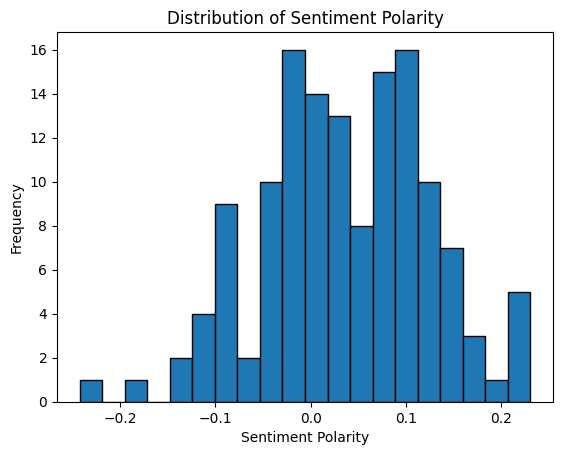

Best Parameters: {'countvectorizer__max_features': None, 'logisticregression__C': 10.0}
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.71      0.88      0.79        17

    accuracy                           0.71        28
   macro avg       0.71      0.67      0.67        28
weighted avg       0.71      0.71      0.70        28

Top three words with the highest weight: ['country', 'part', 'need']


In [ ]:
import spacy
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the small model for English
nlp = spacy.load("en_core_web_sm")

# Function to get sentiment polarity using spacy TextBlobs
def get_sentiment_polarity(text):
    doc = nlp(text)
    blob = TextBlob(doc.text)
    return blob.sentiment.polarity

# Apply sentiment analysis and store polarity in a new column named "polarity" under the dataframe
df['polarity'] = df['text'].apply(get_sentiment_polarity)

# Plot the distribution of sentiment polarity
plt.hist(df['polarity'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Create a machine learning pipeline
pipeline = make_pipeline(CountVectorizer(), LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))

# Define parameter grid for tuning
param_grid = {
    'countvectorizer__max_features': [100, None],
    'logisticregression__C': np.logspace(-2, 2, 5)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['corpus'], (df['polarity'] > 0).astype(int), test_size=0.2, random_state=42)


# Gridsearch to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters & print
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get the feature names from CountVectorizer
feature_names = grid_search.best_estimator_.named_steps['countvectorizer'].get_feature_names_out()

# Get the coefficients of the Logistic Regression model
coefficients = grid_search.best_estimator_.named_steps['logisticregression'].coef_[0]

# Extract the top three words with the highest weight
top_words_indices = coefficients.argsort()[-3:][::-1]
top_words = [feature_names[i] for i in top_words_indices]

print("Top three words with the highest weight:", top_words)

### Model Evaluation
- The model has an accuracy score of 0.71, which entails that it managed to correctly make the positive predictions in 71% out of the total cases.

- Precision is the ratio between number of true positive instances over the sum of the number of true positive instances and false negative instances, and it is used when the cost of false positives is high. In this case, the precision is 0.71.
- Recall is the ratio between the number of true positive instances over the sum of the number of true positive instances and false positive instances, and it is used when the cost of false negatives is high. In this case, the recall is 0.88.
- The F-1 score is the harmonic average of precision and recall, and it is used when we want to have a balance between precision and recall. In this case, the F-1 score is 0.71.

It is worth noting that the macro-metrics are computed as the unweighted average of the metrics for each class, and they are especially important when dealing with class imbalances. We observe here that the macro-metrics are comparable to the micro-metrics, therefore we may conclude that we are not dealing with an imbalanced dataset.

The top three words are 'country', 'part' and 'need', which suggests that these three words are the most associated with a positive sentiment polarity.

Overall the model is considered to perform well on all evaluated metrics.

# Question 3 - Entities



* An **ENTITY** is a word, or group of multiple words that is of a particular type ("one" and "two thousands" are numbers, "September 1st 2023" and "01-09-2023" are dates, "Michael Jordan" is a person's name, "River Gange" is a place's name)
* Identifying entities in a text is a "Named Entity Recognition" task
* You can check this in the Spacy [Documentation](https://spacy.io/universe/project/video-spacys-ner-model-alt)
* Use Spacy to identify all of the named entities in the articles
* Use the model `en_core_web_sm`
* Create a dataframe `entities` with columns `text` and `label`
* Which are the top-3 most frequent labels ?
* Which are the top-3 most frequent entity text for "ORG" label ?
* Same question for the "PERSON" label ?

In [ ]:
import spacy

# Reload model for English
nlp = spacy.load("en_core_web_sm")

# Define function to extract named entities from text
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the entity extraction and store results in a new column "entities" in the dataframe
df['entities'] = df['corpus'].apply(extract_entities)

# Flatten the list of entities in each row
flat_entities = [entity for sublist in df['entities'] for entity in sublist]

# Create a DataFrame with columns 'text' and 'label'
entities_df = pd.DataFrame(flat_entities, columns=['corpus', 'label'])

# Display the entities DataFrame
print(entities_df)

# Top-3 most frequent labels
top_labels = entities_df['label'].value_counts().nlargest(3)
print("\nTop-3 most frequent labels:")
print(top_labels.to_string()) # Convert to string to surpess string representation of pandas

# Top-3 most frequent entity text for "ORG" label
top_org_entities = entities_df[entities_df['label'] == 'ORG']['corpus'].value_counts().nlargest(3)
print("\nTop-3 most frequent entity text for 'ORG' label:")
print(top_org_entities.to_string()) # Convert to string to surpess string representation of pandas

# Top-3 most frequent entity text for "PERSON" label
top_person_entities = entities_df[entities_df['label'] == 'PERSON']['corpus'].value_counts().nlargest(3)
print("\nTop-3 most frequent entity text for 'PERSON' label:")
print(top_person_entities.to_string()) # Convert to string to surpess string representation of pandas

           corpus         label  
0            three hour      TIME
1              lilongwe    PERSON
2             yesterday      DATE
3         kawale bridge       ORG
4                kawale       ORG
...                 ...       ...
1533                one  CARDINAL
1534  benedicto kondowe    PERSON
1535            kondowe    PERSON
1536             malawi    PERSON
1537      wilson moleni    PERSON

[1538 rows x 2 columns]

Top-3 most frequent labels:
PERSON      446
DATE        282
CARDINAL    279

Top-3 most frequent entity text for 'ORG' label:
idai                11
malawi red cross    10
un                   9

Top-3 most frequent entity text for 'PERSON' label:
malawi             88
nicholas dausi     22
peter mutharika    20
